In [ ]:
#name :vaishali akade
#roll:01
#Div:A

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df=pd.read_csv('banknotes.csv')

In [40]:
df.shape

(1372, 5)

In [41]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [42]:
x=df[['Variance','Skewness','Curtosis','Entropy']]
y=df['Class']

In [43]:
# separate input & output

x=df.drop('Class', axis = 1)
y=df['Class']

In [44]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

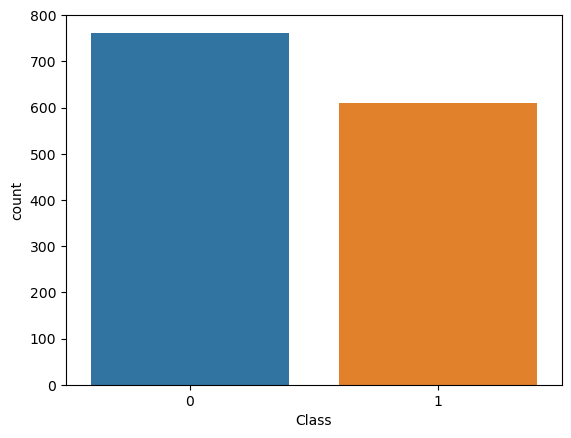

In [46]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x=y)

In [47]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [49]:
x_train

,Variance,Skewness,Curtosis,Entropy
662,2.97360,8.794400,-3.635900,-1.375400
512,2.66480,10.754000,-3.399400,-4.168500
1193,-3.75730,-8.291600,10.303200,0.380590
682,3.73210,-3.884000,3.357700,-0.006049
1313,-1.50780,-7.319100,7.898100,1.228900
...,...,...,...,...
763,0.39012,-0.142790,-0.031994,0.350840
835,-0.94255,0.039307,-0.241920,0.315930
1216,0.60050,0.999450,-2.212600,0.097399
559,2.01650,-0.252460,5.170700,1.076300


In [50]:
x_train.shape

(1029, 4)

In [51]:
y_train.shape

(1029,)

# Cross Validation

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

# build the model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt =  DecisionTreeClassifier(random_state = 0)

In [57]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
# Evalution

In [66]:
y_pred = dt.predict(x_test)

In [ ]:
# confusion matrix


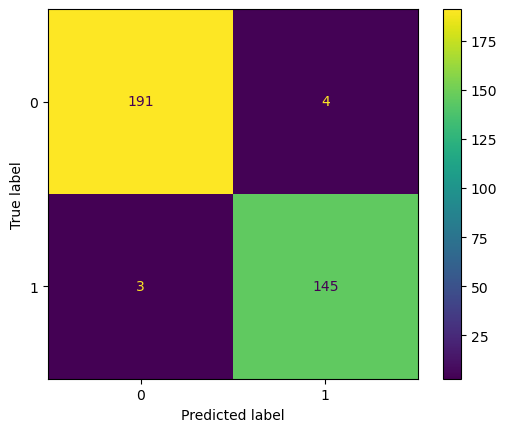

In [68]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred)

0.9795918367346939

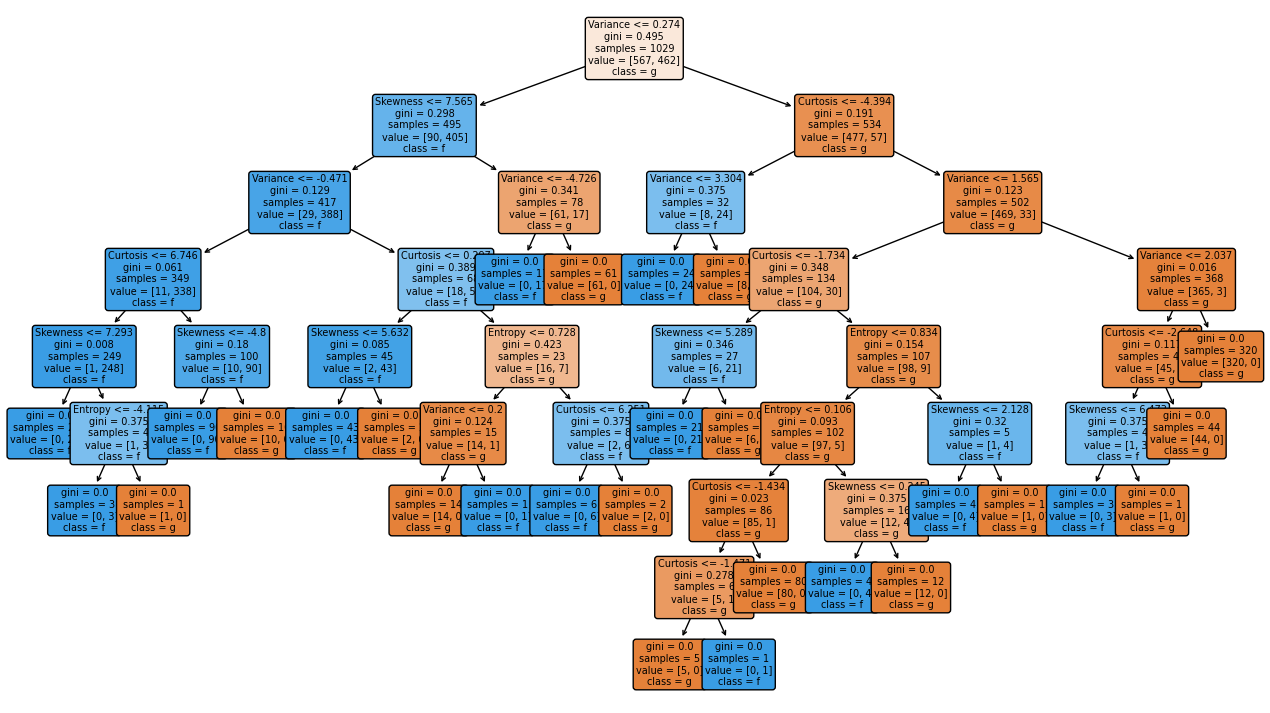

In [80]:
from sklearn.tree import plot_tree
plt.figure(figsize = (16,9))
plot_tree(dt,fontsize = 7,filled = True, rounded = True,class_names = ['g','f'],feature_names=x.columns);

In [83]:
imp=dt.feature_importances_

In [84]:
imp

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

In [85]:
# feature importance

<BarContainer object of 4 artists>

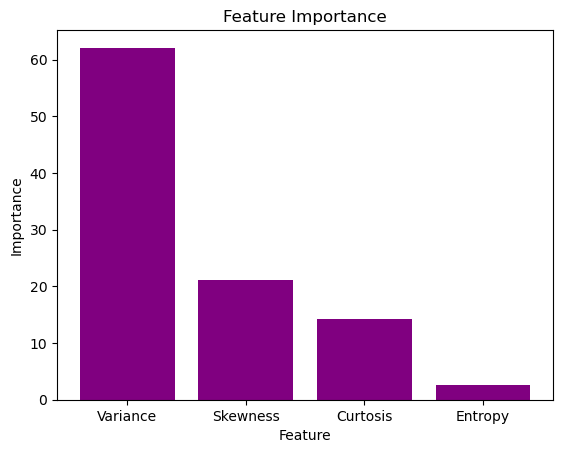

In [88]:
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(x.columns,imp*100,color='purple')

# Key-means

In [90]:
df=pd.read_csv('Mall_Customers.csv')

In [91]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [95]:
x = df.iloc[:,[3,4]]

In [96]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [101]:
from sklearn.cluster import KMeans

In [110]:
km = KMeans(n_clusters=3,random_state=2)

In [111]:
labels=km.fit_predict(x)

In [112]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

## km.inertia_

# Find ideal no.of clusters

In [113]:
labels.shape

(200,)

In [114]:
labels.sum()

115

In [120]:
sse = []
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)


In [121]:
sse

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 31280.903845940928,
 25061.304119069333,
 21862.092672182887,
 19829.031646581992,
 17595.288881085184,
 15817.245013841315,
 14272.165469824295,
 13242.896952139981,
 12203.373831965137]

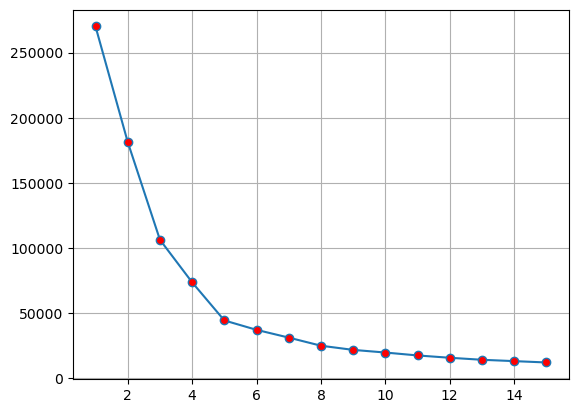

In [123]:
plt.plot(range(1,16),sse,marker='o',mfc='r')
plt.grid()

### Ideal clusters